In [4]:
#Step 1
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [8]:
from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")
rcParams["figure.figsize"] = 10,6
np.random.seed(42)

In [13]:
Diabetes = pd.read_excel(r"D:/Diabetes_D4.xlsx")
Diabetes.sample(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,98,58,33,190,34.0,0.430,43,0
324,112,75,32,0,35.7,0.148,21,0
624,108,64,0,0,30.8,0.158,21,0
690,107,80,0,0,24.6,0.856,34,0
473,136,90,0,0,29.9,0.210,50,0


In [22]:
#Viewing column labels
Diabetes.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
X = Diabetes.drop("Outcome",axis = 1)
y = Diabetes['Outcome']

In [21]:
#Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
#Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,stratify = y,test_size = 0.10 ,random_state = 42)

In [24]:
#Building the model
#n_estimators has max 100
classifier = RandomForestClassifier(n_estimators = 100, criterion = "entropy")
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [26]:
#Predicting Test data
y_pred =classifier.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))



Accuracy: 0.7922077922077922


In [35]:
#Important features

feature_importances_df=pd.DataFrame({"feature":list(X.columns),"importance":classifier.feature_importances_}).sort_values("importance",ascending=False)
feature_importances_df

,feature,importance
0,Glucose,0.254553
4,BMI,0.178009
6,Age,0.153111
5,DiabetesPedigreeFunction,0.148246
1,BloodPressure,0.098595
3,Insulin,0.086272
2,SkinThickness,0.081215


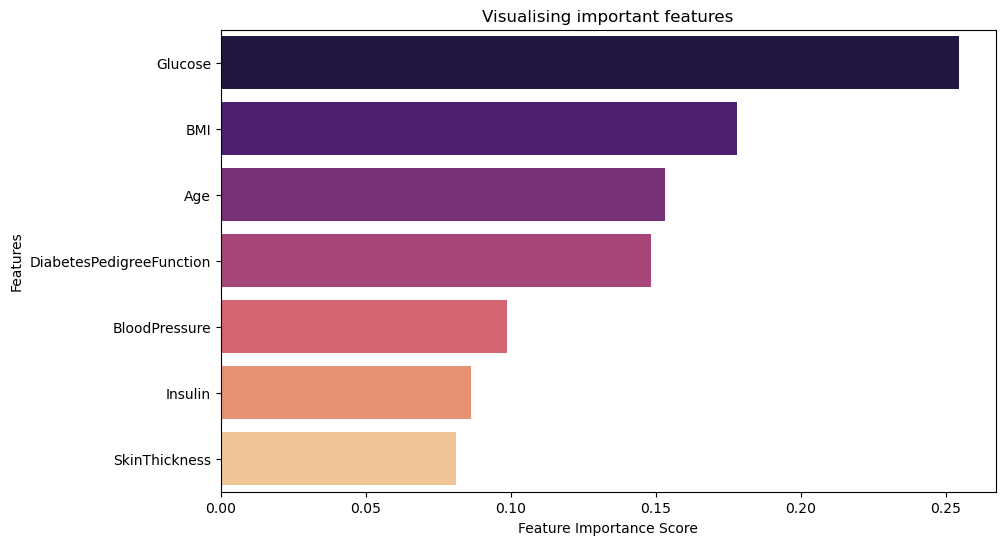

In [39]:
plt.figure(figsize = (10,6))
sns.barplot(x='importance',y='feature',data = feature_importances_df,palette = 'magma')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualising important features")
plt.xticks(fontsize="medium")
plt.yticks(fontsize="medium")
plt.show()

In [43]:
X = Diabetes.drop(["Outcome","SkinThickness"],axis = 1)
y = Diabetes['Outcome']

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [42]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,stratify = y,test_size = 0.10 ,random_state = 42)

In [50]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [52]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8051948051948052


Interpretation
The models accuracy increased from 79 to 80% after we removed the least important feature Skin Thickness
